# A2: Regression Model Development
By Karla Garcia Corral Lobo | Hult International Business School | San Francisco, CA. | February 12, 2023

Bibliography:
Based on Jupiter Notebook scripts by Professor Chase Kusterer.

This assignment focuses on analyzing Apprentice Chef’s customer database to determine the variables that have the most impact on the revenue of the business. The revenue will serve as the dependent variable (y), while the other variables are used as the independent variables (x). This database contains approximately 2,000 customers who made at least one purchase per month for 11 months in their first year, at least one purchase per quarter, or a minimum of 15 purchases throughout their first year.

Our objective was to identify the variables that have the most significant impact on revenue, which can help Apprentice Chef optimize its sales efforts and increase its bottom line. In addition, we developed new features to improve the interpretability of our data and the performance of the model. 

This study begins by examining Chef Apprentice´s customer data to gain an understanding of consumer behavior patterns and their impact on the business´s revenue. In this analysis, we first determined the variables that needed to be cleaned, and identified any new potential features that could be created based on the existing information in the customer database.

In [316]:
# importing libraries
import pandas                  as pd # data science essentials
import matplotlib.pyplot       as plt # data visualization
import seaborn                 as sns # enhanced data visualization
import numpy                   as np  
import statsmodels.formula.api as smf # regression modeling

from sklearn.ensemble          import GradientBoostingRegressor #GBR model
from sklearn.ensemble          import RandomForestRegressor     # random forest model
from sklearn.model_selection   import train_test_split # train/test split
from sklearn.tree              import DecisionTreeRegressor #decision tree model
import sklearn.linear_model # linear modeling in scikit-learn

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)


# checking the file
apprentice.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [317]:
#Printing information about the size of the database, the number or rows and columns.
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     19



In [318]:
# looping to print column names one by one
for column in apprentice:
    print(column)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


In [319]:
# displaying the LAST 5 rows of the DataFrame
apprentice.tail(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
1941,2940.000,Wat (Barleycorn),wat.(barleycorn)@live.com,Wat,NaN,89,6,13,3,143.0,1,5,2,8,0,53.0,5,2.894737,16
1942,7087.500,Hendry Bracken,hendry.bracken@exxon.com,Hendry,Bracken,155,7,13,9,169.4,0,6,2,0,8,39.0,5,2.631579,302
1943,6562.500,Aenys I Targaryen,aenys.i.targaryen@passport.com,Aenys,I Targaryen,65,9,13,6,187.4,1,5,1,0,9,48.0,6,2.631579,310
1944,5355.000,Leo Blackbar,leo.blackbar@pg.com,Leo,Blackbar,58,9,18,10,238.5,3,6,1,0,0,31.0,6,2.631579,275
1945,5194.875,Anguy,anguy@boeing.com,Anguy,Anguy,96,7,19,10,168.9,2,6,2,0,0,47.0,5,2.368421,5


In [297]:
# Information about each variable
apprentice.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [ ]:
#dividing the columns into categories depending on the data type

CONTINUOUS:
----------
REVENUE
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME
AVG_MEAN_RATING

INTERVAL/COUNT:
--------------
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS 
WEEKLY_PLAN 
LATE_DELIVERIES
LARGEST_ORDER_SIZE
TOTAL_PHOTOS_VIEWED

CATEGORICAL/OTHER:
-----------------
NAME
EMAIL 
FIRST_NAME
FAMILY_NAME

In [298]:
# Checking if there are null values on the data and then summing the results per column
apprentice.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

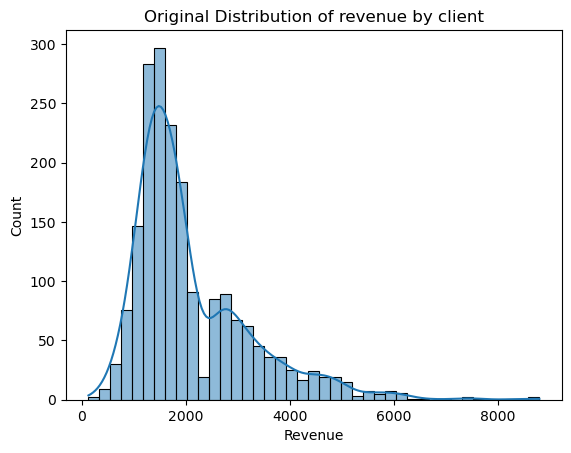

In [299]:
# developing a histogram using HISTPLOT to see how the revenue is distributed by client.
sns.histplot(data  = apprentice,
             x     = "REVENUE",
            kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of revenue by client")
plt.xlabel(xlabel = "Revenue")
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

# Data Cleaning

Following our analysis on Chef Apprentice´s customer data, we identified several interesting elements which may impact the ability to perform the analysis. These elements are summarized below:
- Data Type: of the 19 features present in the data set, only 15 will be utilized in this analysis. The remaining four features have an object data type (e.g., text string), which was determined to be qualitative and would not be incorporated into the analysis.
- Data Classification: the features with a float data type will be categorized as “continuous”, while those with an integer data type will be placed under “interval/count”. 
- Missing values: There are 46 missing values, which are exclusively in the “FAMILY_NAME” feature. 
- Data Skewness: The revenue feature exhibits a right-skewed distribution, which suggests the presence of outliers that have the potential to impact the interpretation of the data. Therefore, the mean may not accurately represent the central tendency of the data.

Based on these observations, it is evident that the database will require cleaning prior to performing the analysis. 

In addition to filling in the empty spaces in “FAMILY_NAME” and dropping the features with an object data type, logarithmic features were created on those features that showed skewness. As mentioned above, this will help us normalize the distribution of the data to make it more symmetrical, thus improving the performance of the models as well as improving the interpretability of the model by providing meaningful units of measurement. 

In [300]:
# instantiating an imputation value
fill = "Unknown"


# imputing 'FAMILY_NAME'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill)

In [301]:
#dropping the columns that their data type is object.
apprentice = apprentice.drop(['NAME',
                            'EMAIL',
                            'FIRST_NAME',
                            'FAMILY_NAME'], axis = 1)
apprentice.head(n = 5)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [302]:
# Checking if all the null values are filled. 
apprentice.isnull().any().any()

False

In [303]:
#checing what variables have a skewness of -1 or +1
round(apprentice.skew(), ndigits =1)

REVENUE                        1.6
TOTAL_MEALS_ORDERED            2.0
UNIQUE_MEALS_PURCH             0.6
CONTACTS_W_CUSTOMER_SERVICE    0.4
PRODUCT_CATEGORIES_VIEWED      0.2
AVG_TIME_PER_SITE_VISIT        1.2
CANCELLATIONS_AFTER_NOON       1.4
PC_LOGINS                     -0.0
MOBILE_LOGINS                  0.1
WEEKLY_PLAN                    1.5
LATE_DELIVERIES                1.7
AVG_PREP_VID_TIME              9.6
LARGEST_ORDER_SIZE             0.7
AVG_MEAN_RATING               -0.1
TOTAL_PHOTOS_VIEWED            2.6
dtype: float64

# Features Development

When developing the new features, it was important to keep in mind that Apprentice Chef, inc. is an innovative company that offers daily prepared, easy gourmet meal kits to cook at home made from fresh ingredients. Their target market consists of busy professionals who lack the time needed for cooking healthy meals but still desire a high-quality, home-cooked meal, rather than relying on food delivery.  Their customer journey experience consists of either visiting the website or downloading the mobile app, registering, selecting meals, and setting a delivery schedule. 
When assessing Chef Apprentice´s business model, some key points influenced the features which I chose to investigate. These points are highlighted below:
•	The Chef Apprentice meal kit cooking process typically takes approximately 30 minutes to complete, facilitated by the inclusion of disposable cookware for fast and easy cleanup.
•	In addition to the necessary ingredients included in the kit, customers receive a short instructional video to guide them through the cooking process.
•	The ordering of meals can be conveniently conducted through either a user-friendly online platform or a mobile application.
•	Customers can contact customer service via phone or webchat to change orders or delivery schedules, but most commonly, to file a complaint.

Based on this information, 5 new features were created to provide better insights into customer behavior and patterns that may help increase revenue. 

- “AVG_NUM_MEALS”: This feature can help us understand the customer’s spending habits. A higher number of meals could indicate that customers are ordering multiple meals at once, which could increase revenue. 
- “SERVICE_CONTACT_RATIO”: This feature may indicate a customer’s dissatisfaction with the service which could negatively affect revenue. Moreover, a low ratio could indicate that customers are satisfied with the service. 
- “LOGIN_FREQUENCY”: This feature could indicate that a customer is engaging with the company, which can lead to more purchases in the future.
- “ENGAGEMENT”: This feature helps to measure the overall engagement of a customer on the website. Customers with a high score could indicate that the customer is interested in what the company is offering. 
- “WEEKLY_PLAN_PREP_VID_TIME”: This feature can give us insights into whether having a weekly plan affects the average preparation video time and whether this affects customer satisfaction. If the implementation of a weekly plan leads to an increase in the average preparation video time, this may result in decreased customer satisfaction.

In [304]:
#creating the new features
apprentice['AVG_NUM_MEALS'] = apprentice['TOTAL_MEALS_ORDERED'] / apprentice['UNIQUE_MEALS_PURCH']
apprentice['SERVICE_CONTACT_RATIO'] = apprentice['CONTACTS_W_CUSTOMER_SERVICE'] / apprentice['UNIQUE_MEALS_PURCH']
apprentice['LOGIN_FREQUENCY'] = (apprentice['PC_LOGINS'] + apprentice['MOBILE_LOGINS']) / 2
apprentice['ENGAGEMENT'] = apprentice['AVG_TIME_PER_SITE_VISIT'] * apprentice['PRODUCT_CATEGORIES_VIEWED']
apprentice['WEEKLY_PLAN_PREP_VID_TIME'] = apprentice['WEEKLY_PLAN'] * apprentice['AVG_PREP_VID_TIME']


apprentice.describe(include = 'number'). round(decimals = 2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,AVG_NUM_MEALS,SERVICE_CONTACT_RATIO,LOGIN_FREQUENCY,ENGAGEMENT,WEEKLY_PLAN_PREP_VID_TIME
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15,11.74,0.79,3.50,814.17,1163.11
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15,8.18,0.53,0.39,574.10,2334.34
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00,1.00,0.08,2.50,54.00,0.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00,6.60,0.40,3.00,346.90,63.73
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00,9.83,0.71,3.50,691.05,573.31
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00,15.32,1.00,4.00,1127.70,1399.50
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00,68.75,8.00,4.50,5642.00,75697.60


In [231]:
round(apprentice.skew(), ndigits =1)

REVENUE                         1.6
TOTAL_MEALS_ORDERED             2.0
UNIQUE_MEALS_PURCH              0.6
CONTACTS_W_CUSTOMER_SERVICE     0.4
PRODUCT_CATEGORIES_VIEWED       0.2
AVG_TIME_PER_SITE_VISIT         1.2
CANCELLATIONS_AFTER_NOON        1.4
PC_LOGINS                      -0.0
MOBILE_LOGINS                   0.1
WEEKLY_PLAN                     1.5
LATE_DELIVERIES                 1.7
AVG_PREP_VID_TIME               9.6
LARGEST_ORDER_SIZE              0.7
AVG_MEAN_RATING                -0.1
TOTAL_PHOTOS_VIEWED             2.6
AVG_NUM_MEALS                   1.5
SERVICE_CONTACT_RATIO           2.4
LOGIN_FREQUENCY                 0.0
ENGAGEMENT                      1.4
WEEKLY_PLAN_PREP_VID_TIME      17.7
dtype: float64

In [305]:
#transforming the skewed variables into log variables by adding 0.001 
# to help to normalize the data and make it more symmetrical. 

apprentice['log_REVENUE'] = np.log(apprentice['REVENUE']+ 0.001)
apprentice['log_TOTAL_MEALS_ORDERED'] = np.log(apprentice['TOTAL_MEALS_ORDERED']+ 0.001)
apprentice['log_AVG_TIME_PER_SITE_VISIT'] = np.log(apprentice['AVG_TIME_PER_SITE_VISIT']+ 0.001)
apprentice['log_CANCELLATIONS_AFTER_NOON'] = np.log(apprentice['CANCELLATIONS_AFTER_NOON']+ 0.001)
apprentice['log_WEEKLY_PLAN'] = np.log(apprentice['WEEKLY_PLAN']+ 0.0001)
apprentice['log_LATE_DELIVERIES'] = np.log(apprentice['LATE_DELIVERIES ']+ 0.001)
apprentice['log_AVG_PREP_VID_TIME'] = np.log(apprentice['AVG_PREP_VID_TIME']+ 0.001)
apprentice['log_TOTAL_PHOTOS_VIEWED'] = np.log(apprentice['TOTAL_PHOTOS_VIEWED']+ 0.001)
apprentice['log_AVG_NUM_MEALS'] = np.log(apprentice['LATE_DELIVERIES ']+ 0.001)
apprentice['log_SERVICE_CONTACT_RATIO'] = np.log(apprentice['AVG_PREP_VID_TIME']+ 0.001)
apprentice['log_ENGAGEMENT'] = np.log(apprentice['AVG_PREP_VID_TIME']+ 0.001)
apprentice['log_WEEKLY_PLAN_PREP_VID_TIME'] = np.log(apprentice['TOTAL_PHOTOS_VIEWED']+ 0.001)

In [306]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
df_corr.loc[ : , ['log_REVENUE'] ].sort_values(by = 'log_REVENUE',
                                                                ascending = False)

,log_REVENUE
log_REVENUE,1.00
REVENUE,0.95
log_TOTAL_MEALS_ORDERED,0.69
log_AVG_TIME_PER_SITE_VISIT,0.67
AVG_TIME_PER_SITE_VISIT,0.65
TOTAL_MEALS_ORDERED,0.61
LARGEST_ORDER_SIZE,0.45
AVG_NUM_MEALS,0.44
TOTAL_PHOTOS_VIEWED,0.43
log_TOTAL_PHOTOS_VIEWED,0.42


In [307]:
# making a copy of CASE DATA TO GET INFO for SMF
apprentice_explanatory = apprentice.copy()

# formatting each explanatory variable for statsmodels
for val in apprentice_explanatory:
    print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
CANCELLATIONS_AFTER_NOON +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
LATE_DELIVERIES  +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
AVG_MEAN_RATING +
TOTAL_PHOTOS_VIEWED +
AVG_NUM_MEALS +
SERVICE_CONTACT_RATIO +
LOGIN_FREQUENCY +
ENGAGEMENT +
WEEKLY_PLAN_PREP_VID_TIME +
log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_AVG_TIME_PER_SITE_VISIT +
log_CANCELLATIONS_AFTER_NOON +
log_WEEKLY_PLAN +
log_LATE_DELIVERIES +
log_AVG_PREP_VID_TIME +
log_TOTAL_PHOTOS_VIEWED +
log_AVG_NUM_MEALS +
log_SERVICE_CONTACT_RATIO +
log_ENGAGEMENT +
log_WEEKLY_PLAN_PREP_VID_TIME +


In [308]:
# building a fit model

# blueprinting a model type
lm_fit = smf.ols(formula = """log_REVENUE ~ UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            LARGEST_ORDER_SIZE +
                                            AVG_MEAN_RATING +
                                            LOGIN_FREQUENCY +
                                            ENGAGEMENT +
                                            WEEKLY_PLAN_PREP_VID_TIME +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_AVG_TIME_PER_SITE_VISIT +
                                            log_CANCELLATIONS_AFTER_NOON +
                                            log_WEEKLY_PLAN +
                                            log_LATE_DELIVERIES +
                                            log_AVG_PREP_VID_TIME +
                                            log_TOTAL_PHOTOS_VIEWED +
                                            log_AVG_NUM_MEALS +
                                            log_SERVICE_CONTACT_RATIO +
                                            log_ENGAGEMENT +
                                            log_WEEKLY_PLAN_PREP_VID_TIME """,
                                               data = apprentice)


# telling Python to run the data through the blueprint
results_fit = lm_fit.fit()


# printing the results
results_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     273.4
Date:                Sun, 12 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:50:02   Log-Likelihood:                -211.22
No. Observations:                1946   AIC:                             456.4
Df Residuals:                    1929   BIC:                             551.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.4615      0.248     13.971      0.000       2.976       3.947
UNIQUE_MEALS_PURCH                0.0183      0.003      6.178      0.000       0.012       0.024
CONTACTS_W_CUSTOMER_SERVICE       0.0307      0.003     12.019      0.000       0.026       0.036
PRODUCT_CATEGORIES_VIEWED         0.0021      0.006      0.373      0.709      -0.009       0.013
PC_LOGINS                        -0.0041      0.009     -0.451      0.652      -0.022       0.014
MOBILE_LOGINS                     0.0128      0.010      1.277      0.202      -0.007       0.032
LARGEST_ORDER_SIZE               -0.0450      0.007     -6.643      0.000      -0.058      -0.032
AVG_MEAN_RATING                  -0.1328      0.012    -10.799      0.000      -0.157      -0.109
LOGIN_FREQUENCY                   0.0043      0.005      0.820      0.412      -0.006       0.015
ENGAGEMENT                     1.005e-05   3.45e-05      0.291      0.771   -5.76e-05    7.78e-05
WEEKLY_PLAN_PREP_VID_TIME        5.2e-06   3.01e-06      1.730      0.084   -6.96e-07    1.11e-05
log_TOTAL_MEALS_ORDERED           0.2863      0.012     24.651      0.000       0.264       0.309
log_AVG_TIME_PER_SITE_VISIT       0.6729      0.047     14.311      0.000       0.581       0.765
log_CANCELLATIONS_AFTER_NOON      0.0010      0.002      0.561      0.575      -0.002       0.004
log_WEEKLY_PLAN                  -0.0029      0.001     -2.168      0.030      -0.006      -0.000
log_LATE_DELIVERIES              -0.0012      0.001     -1.589      0.112      -0.003       0.000
log_AVG_PREP_VID_TIME            -0.0147      0.005     -3.088      0.002      -0.024      -0.005
log_TOTAL_PHOTOS_VIEWED           0.0153      0.002      7.204      0.000       0.011       0.019
log_AVG_NUM_MEALS                -0.0012      0.001     -1.589      0.112      -0.003       0.000
log_SERVICE_CONTACT_RATIO        -0.0147      0.005     -3.088      0.002      -0.024      -0.005
log_ENGAGEMENT                   -0.0147      0.005     -3.088      0.002      -0.024      -0.005
log_WEEKLY_PLAN_PREP_VID_TIME     0.0153      0.002      7.204      0.000       0.011       0.019
==============================================================================
Omnibus:                      123.941   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.970
Skew:                          -0.244   Prob(JB):                     3.87e-92
Kurtosis:                       5.226   Cond. No.                     1.83e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.03e-31. This might indicat

# Model Development 

Prior to the development of the models, examination, and cleaning of the data were conducted. As demonstrated above, after the creation of new features, they were evaluated for skewness, and subsequently, the relevant logarithmic variables were generated. 

To start the development of the model, the features were first divided into individual lists so that at the time of calling them to the model it was easier to call specific ones. However, after testing the three lists, it was very evident that using the “full_x” was giving the best result. 


In this study, three regression models were constructed and evaluated, including the Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor. The results showed that all three models had high training scores, with values of 0.79, 0.84, and 0.83, respectively. Among the models, the Random Forest Regressor was found to have the lowest train-test gap of 0.05. 

The creation of these models was aimed to determine which one was the most suitable for the dataset being analyzed. Each model has its own unique set of advantages and disadvantages, but it was important to evaluate all three models to determine the best fit for this analysis. The final output revealed that the selected model, the Random Forest Regressor, had the best fit for the training data and demonstrated good predictive power. This indicated that the model was not overfitting to the training data and had a good ability to generalize to new data, indicating good performance.

Before arriving at these results, an initial model was constructed using the "reduced_x" variables. However, this model did not perform well and showed a high train-test gap and a low training score. Through the examination of multiple regressions, it was concluded that the creation of new features and the conversion of skewed variables into logarithmic, improved the analysis of the data and provided better insights into how these factors impacted the objective of the study, which was the analysis of revenue.

In conclusion, it can be said that 84% of the feature had a strong correlation to the revenue, with a confidence of 95%. These findings highlight the importance of conducting a thorough analysis of the data before developing a predictive model, as it ensures that the best possible model is created, and the results are accurate and reliable. 

In [309]:
# declaring sets of x-variables
x_variables = ['UNIQUE_MEALS_PURCH','AVG_MEAN_RATING','LOGIN_FREQUENCY',
               'ENGAGEMENT','WEEKLY_PLAN_PREP_VID_TIME']

full_x = ['CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED','PC_LOGINS','MOBILE_LOGINS'
          'LARGEST_ORDER_SIZE','log_TOTAL_MEALS_ORDERED','log_AVG_TIME_PER_SITE_VISIT',
          'log_CANCELLATIONS_AFTER_NOON','log_WEEKLY_PLAN','log_LATE_DELIVERIES','log_AVG_PREP_VID_TIME'
          'log_TOTAL_PHOTOS_VIEWED', 'log_AVG_NUM_MEALS', 'log_SERVICE_CONTACT_RATIO','log_ENGAGEMENT',
          'log_WEEKLY_PLAN_PREP_VID_TIME', 'UNIQUE_MEALS_PURCH','AVG_MEAN_RATING','LOGIN_FREQUENCY',
          'ENGAGEMENT','WEEKLY_PLAN_PREP_VID_TIME']


reduced_x = ['log_TOTAL_MEALS_ORDERED','log_AVG_TIME_PER_SITE_VISIT','log_WEEKLY_PLAN']

In [310]:
# preparing x-variables
#x_data = apprentice.loc[ : , reduced_x ] # x-variables
#x_data = apprentice.drop(['log_REVENUE'], axis = 1)
x_data = apprentice.drop(['REVENUE','log_REVENUE'], axis = 1)

# preparing y-variable
y_data = apprentice.loc[ : , 'log_REVENUE']    # y-variable

# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219 )

In [257]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [311]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(criterion        = 'friedman_mse',
                              splitter         = 'best',
                              random_state     = 219,
                              min_samples_leaf = 21,
                              max_depth        = 9,
                              max_features      = 'auto')


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7923
Testing Score  : 0.7082
Train-Test Gap : 0.0841


In [276]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'squared_er

In [313]:
# Model Number 2: Gradient Boosting Regressor
model_name = 'Unpruned GBM'


# INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(loss          = 'quantile',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  max_depth     = 15,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(6) # using R-square
model_test_score  = model.score(x_test, y_test).round(6)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(6)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.831423
Testing Score  : 0.756235
Train-Test Gap : 0.075188


In [266]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [312]:
# specifying a model name
model_name = "Random Forest"


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = "squared_error",
                              max_depth        = 5,
                              min_samples_leaf = 1,
                              warm_start       = False,
                              random_state     = 219)

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8401
Testing Score  : 0.785
Train-Test Gap : 0.0551
